# Introduction to Regression with Neural Networks in Tensorflow

In [1]:
import tensorflow as tf
tf.__version__

'2.9.0'

### Creating a data to view and fit

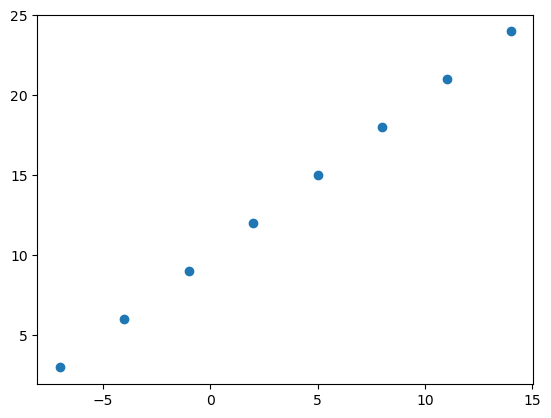

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
#Create labels
y=np.array([3.,6.,9.,12.,15.,18.,21.,24.])
#Visualize it
plt.scatter(X,y)

In [3]:
y == (X+10)

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Create a demo tensor for housing price prediction
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-24 21:39:31.105686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-24 21:39:31.105943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [6]:
# Turn our np array into tensor
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with Tensorflow

1. Creating a model - define input and output layers and hidden layers
2. Compile a model - define the loss function, the function which tells how good our model is and optimizer which tells our model to improve
3. Fitting a model - letting the model try to find patterns between X and y

In [7]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae","accuracy"]
              )
# 3. Fit the model
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5


2023-05-24 21:39:31.379256: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 306ms/step - loss: 11.5048 - mae: 11.5048 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748 - accuracy: 0.0000e+00


2023-05-24 21:39:31.607773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [8]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Improving the model

We can improve the model by altering the steps taken
1. Creating a model - increase the hidden layers and also change the activation function of each layer
2. Compiling a model - change optimization function and learning rate hyper-parameter
3. Fitting model - increase epochs or increase data

In [9]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae","accuracy"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 180ms/step - loss: 11.2219 - mae: 11.2219 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 6ms/step

2023-05-24 21:39:31.950259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 6ms/step - loss: 9.1019 - mae: 9.1019 - accuracy: 0.0000e+00
Epoch 18/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9694 - mae: 8.9694 - accuracy: 0.0000e+00
Epoch 19/100
1/1 [==============================] - 0s 6ms/step - loss: 8.8369 - mae: 8.8369 - accuracy: 0.0000e+00
Epoch 20/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7044 - mae: 8.7044 - accuracy: 0.0000e+00
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5719 - mae: 8.5719 - accuracy: 0.0000e+00
Epoch 22/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4394 - mae: 8.4394 - accuracy: 0.0000e+00
Epoch 23/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3069 - mae: 8.3069 - accuracy: 0.0000e+00
Epoch 24/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1744 - mae: 8.1744 - accuracy: 0.0000e+00
Epoch 25/100
1/1 [==============================] - 0s 6ms/step - loss: 8.0419 - mae:

In [10]:
model.predict([17.])

1/1 [==============================] - 0s 48ms/step


2023-05-24 21:39:32.906837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[29.739855]], dtype=float32)

In [11]:
# teaking the model to improve
# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae',"accuracy"]
              )
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-05-24 21:39:33.134082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 221ms/step - loss: 10.5736 - mae: 10.5736 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5286 - mae: 10.5286 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4836 - mae: 10.4836 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4386 - mae: 10.4386 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3936 - mae: 10.3936 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3486 - mae: 10.3486 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3036 - mae: 10.3036 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2586 - mae: 10.2586 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 29ms/step


2023-05-24 21:39:34.091116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[30.486946]], dtype=float32)

In [13]:
# adding hidden layers this time
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae']
              )
model.fit(tf.expand_dims(X,axis=-1),y,epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 273ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/150
1/1 [==============================] - 0s 6ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/150
1/1 [==============================] - 0s 5ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/150
1/1 [==============================] - 0s 6ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/150
1/1 [==============================] - 0s 6ms/step - loss: 10.7952 - mae: 10.7952
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/150
1/1 [==============================] - 0s 6ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/150
1/1 [==============================] - 0s 6ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/150


2023-05-24 21:39:34.300189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step - loss: 7.2723 - mae: 7.2723
Epoch 12/150
1/1 [==============================] - 0s 6ms/step - loss: 6.6391 - mae: 6.6391
Epoch 13/150
1/1 [==============================] - 0s 7ms/step - loss: 6.6431 - mae: 6.6431
Epoch 14/150
1/1 [==============================] - 0s 5ms/step - loss: 6.9209 - mae: 6.9209
Epoch 15/150
1/1 [==============================] - 0s 6ms/step - loss: 7.0981 - mae: 7.0981
Epoch 16/150
1/1 [==============================] - 0s 5ms/step - loss: 7.2571 - mae: 7.2571
Epoch 17/150
1/1 [==============================] - 0s 6ms/step - loss: 7.2612 - mae: 7.2612
Epoch 18/150
1/1 [==============================] - 0s 5ms/step - loss: 7.1038 - mae: 7.1038
Epoch 19/150
1/1 [==============================] - 0s 6ms/step - loss: 6.8542 - mae: 6.8542
Epoch 20/150
1/1 [==============================] - 0s 6ms/step - loss: 6.6416 - mae: 6.6416
Epoch 21/150
1/1 [==============================] - 0s 6ms/step - loss: 6.4074 - ma

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 53ms/step


2023-05-24 21:39:35.741268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[26.493591]], dtype=float32)

In [15]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
# Make labels for the data set
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

([<matplotlib.lines.Line2D at 0x291a0cac0>],
 <matplotlib.collections.PathCollection at 0x2980ba3a0>)

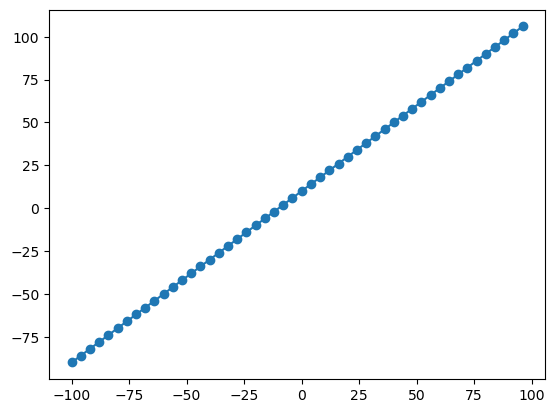

In [17]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y),plt.scatter(X,y)

### The 2-3 sets...

In [18]:
# Check the length of the sample we have
len(X)

50

In [19]:
# Split the data into train-test set
X_train = X[:40]
y_train=y[:40]
X_test = X[40:]
y_test = y[40:]
X_train,X_test,y_train,y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

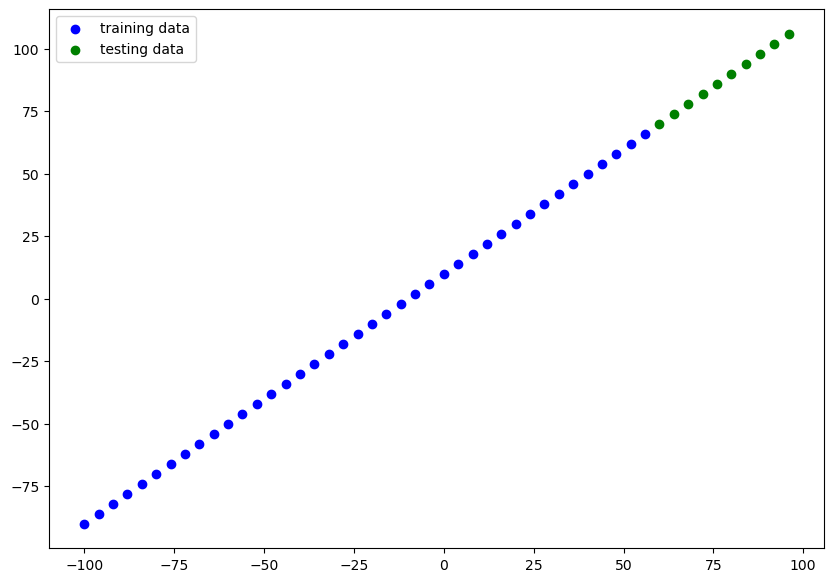

In [20]:
plt.figure(figsize=(10,7))

plt.scatter(X_train,y_train,c='b',label='training data')

plt.scatter(X_test,y_test,c='g',label="testing data")

plt.legend()

In [21]:
# building a neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae']
              )
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=150)

Epoch 1/150
2/2 [==============================] - 0s 57ms/step - loss: 38.8953 - mae: 38.8953
Epoch 2/150


2023-05-24 21:39:36.426525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 7ms/step - loss: 12.2360 - mae: 12.2360
Epoch 3/150
2/2 [==============================] - 0s 6ms/step - loss: 18.3059 - mae: 18.3059
Epoch 4/150
2/2 [==============================] - 0s 6ms/step - loss: 9.2024 - mae: 9.2024
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 8.2558 - mae: 8.2558
Epoch 6/150
2/2 [==============================] - 0s 6ms/step - loss: 5.4881 - mae: 5.4881
Epoch 7/150
2/2 [==============================] - 0s 6ms/step - loss: 9.3921 - mae: 9.3921
Epoch 8/150
2/2 [==============================] - 0s 6ms/step - loss: 8.7121 - mae: 8.7121
Epoch 9/150
2/2 [==============================] - 0s 8ms/step - loss: 7.0853 - mae: 7.0853
Epoch 10/150
2/2 [==============================] - 0s 8ms/step - loss: 6.9149 - mae: 6.9149
Epoch 11/150
2/2 [==============================] - 0s 8ms/step - loss: 9.0258 - mae: 9.0258
Epoch 12/150
2/2 [==============================] - 0s 7ms/step - loss: 6.3256 - mae: 

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               200       
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


##### model(x) gives a tensor object but model.predict(x) only gives numpy array

In [23]:
a = model.predict(X_test)
b = model(X_test)
b

1/1 [==============================] - 0s 57ms/step


2023-05-24 21:39:39.505710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[65.37186 ],
       [69.09059 ],
       [72.80933 ],
       [76.528076],
       [80.24704 ],
       [83.96783 ],
       [87.68875 ],
       [91.40967 ],
       [95.130585],
       [98.85149 ]], dtype=float32)>

In [24]:
model.evaluate(model(X_test),y_test)

2023-05-24 21:39:39.671164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 132ms/step - loss: 2.5467 - mae: 2.5467


[2.546679735183716, 2.546679735183716]

In [25]:
# Creating model that builds automatically
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
],name='model_1')
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are parameters(patterns) that the model can update
* Non-trainable paramas - these are not updated during training, happens when you bring already learnt from other models

In [27]:
# Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

2023-05-24 21:39:40.167848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [28]:
model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


2023-05-24 21:39:41.213837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[ 70.552216],
       [ 75.13992 ],
       [ 79.72766 ],
       [ 84.31539 ],
       [ 88.9031  ],
       [ 93.49083 ],
       [ 98.07856 ],
       [102.666275],
       [107.25401 ],
       [111.84173 ]], dtype=float32)

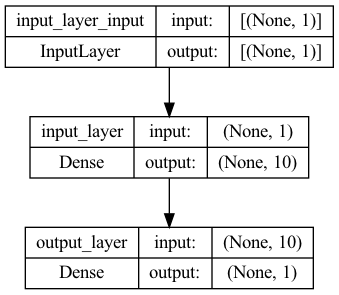

In [29]:
tf.keras.utils.plot_model(model,show_shapes=True)

### Visualizing model predictions

To visualize prediction, a good idea is to plot them against ground truth labels

In [30]:
y_pred=model.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 10ms/step


(array([[ 70.552216],
        [ 75.13992 ],
        [ 79.72766 ],
        [ 84.31539 ],
        [ 88.9031  ],
        [ 93.49083 ],
        [ 98.07856 ],
        [102.666275],
        [107.25401 ],
        [111.84173 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

1/1 [==============================] - 0s 11ms/step


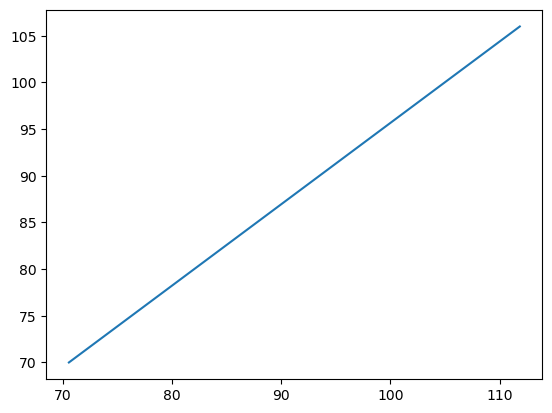

In [31]:
plt.plot(model.predict(X_test),y_test)

In [32]:
# Creating a plotting function:
def plot_prediction(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,predictions=y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_label,c='b',label='training_data')
  #Plot testing data in green
  plt.scatter(test_data,test_label,c='g',label="testing_data")
  #Plot predictions
  plt.scatter(test_data,predictions,c='r',label="predictions")
  #legends
  plt.legend()

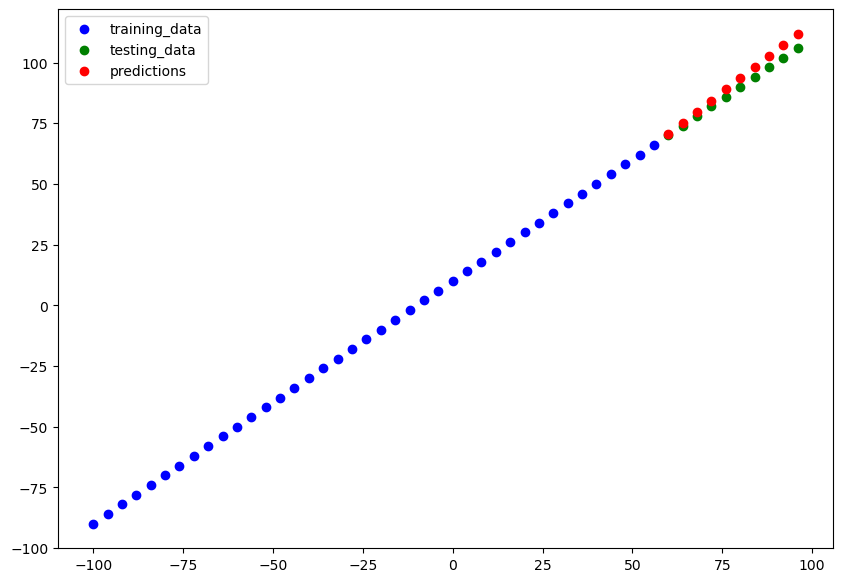

In [33]:
plot_prediction(X_train,y_train,X_test,y_test,y_pred)

### Evaluating models prediction with regression evaluation matrix

Two types:
1. MAE
2. MSE

In [34]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 78ms/step - loss: 3.1970 - mae: 3.1970


2023-05-24 21:39:42.508373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[3.196969509124756, 3.196969509124756]

In [35]:
y_pred,y_test

(array([[ 70.552216],
        [ 75.13992 ],
        [ 79.72766 ],
        [ 84.31539 ],
        [ 88.9031  ],
        [ 93.49083 ],
        [ 98.07856 ],
        [102.666275],
        [107.25401 ],
        [111.84173 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [36]:
# Calculate MAE
y_pred=tf.squeeze(tf.constant(y_pred))
tf.metrics.mean_absolute_error(y_test,y_pred), tf.keras.losses.mae(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969697>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.1969697>)

In [37]:
# Calculate MSE
tf.metrics.mean_squared_error(y_test,y_pred), tf.keras.losses.mse(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=13.070331>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070331>)

In [38]:
y_test,y_train

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [39]:
# Calculate Huber
h= tf.losses.Huber()
h(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069952>

In [40]:
# make functions to reuse mae and mse
def mae_mse(y_test,y_pred):
  return tf.keras.losses.mae(y_test,y_pred).numpy(),tf.keras.losses.mse(y_test,y_pred).numpy()

In [41]:
mae_mse(y_test,y_pred)

(3.1969697, 13.070331)

In [42]:
X=tf.reshape(tf.range(1,15626),shape=(125,125))
y=tf.reshape(tf.range(1,15626),shape=(125,125))
X,y

(<tf.Tensor: shape=(125, 125), dtype=int32, numpy=
 array([[    1,     2,     3, ...,   123,   124,   125],
        [  126,   127,   128, ...,   248,   249,   250],
        [  251,   252,   253, ...,   373,   374,   375],
        ...,
        [15251, 15252, 15253, ..., 15373, 15374, 15375],
        [15376, 15377, 15378, ..., 15498, 15499, 15500],
        [15501, 15502, 15503, ..., 15623, 15624, 15625]], dtype=int32)>,
 <tf.Tensor: shape=(125, 125), dtype=int32, numpy=
 array([[    1,     2,     3, ...,   123,   124,   125],
        [  126,   127,   128, ...,   248,   249,   250],
        [  251,   252,   253, ...,   373,   374,   375],
        ...,
        [15251, 15252, 15253, ..., 15373, 15374, 15375],
        [15376, 15377, 15378, ..., 15498, 15499, 15500],
        [15501, 15502, 15503, ..., 15623, 15624, 15625]], dtype=int32)>)

In [43]:
X_train=X[:100]
y_train=y[:100]
X_test=X[100:]
y_test=y[100:]

In [44]:
# Build a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,name="output_layer")
],name='model_2')
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

2023-05-24 21:39:43.269109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [45]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 73ms/step


2023-05-24 21:39:46.409450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [46]:
tf.squeeze(y_pred).shape,y_test.shape

(TensorShape([25, 125]), TensorShape([25, 125]))

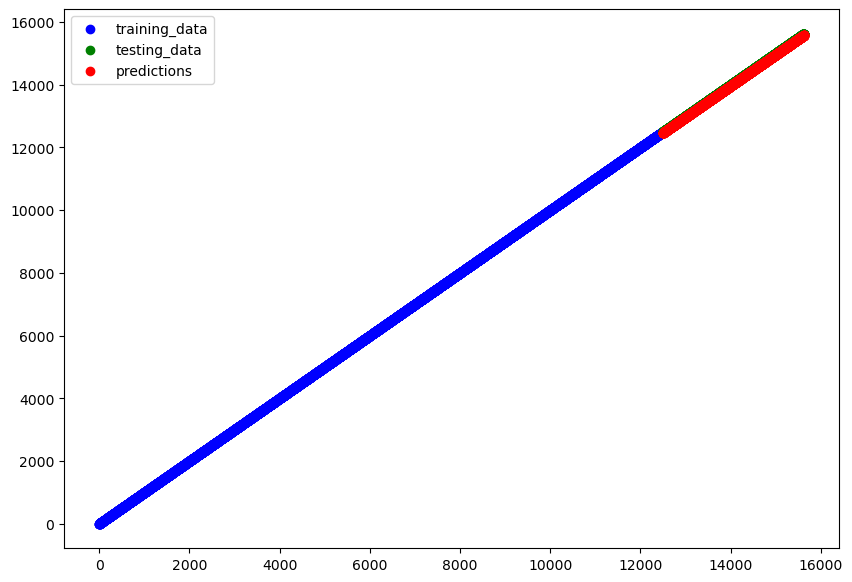

In [47]:
plot_prediction(X_train,y_train,X_test,y_test,y_pred)

In [48]:
(y_test).shape,tf.squeeze(y_pred).shape

(TensorShape([25, 125]), TensorShape([25, 125]))

In [49]:
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(25, 125), dtype=float32, numpy=
array([[12461.552 , 12462.548 , 12463.545 , ..., 12583.163 , 12584.161 ,
        12585.157 ],
       [12586.153 , 12587.151 , 12588.147 , ..., 12707.766 , 12708.762 ,
        12709.759 ],
       [12710.757 , 12711.753 , 12712.749 , ..., 12832.368 , 12833.364 ,
        12834.361 ],
       ...,
       [15202.8   , 15203.796 , 15204.793 , ..., 15324.41  , 15325.407 ,
        15326.404 ],
       [15327.4   , 15328.399 , 15329.3955, ..., 15449.013 , 15450.011 ,
        15451.006 ],
       [15452.003 , 15452.999 , 15453.997 , ..., 15573.614 , 15574.612 ,
        15575.608 ]], dtype=float32)>

In [50]:
y_test

<tf.Tensor: shape=(25, 125), dtype=int32, numpy=
array([[12501, 12502, 12503, ..., 12623, 12624, 12625],
       [12626, 12627, 12628, ..., 12748, 12749, 12750],
       [12751, 12752, 12753, ..., 12873, 12874, 12875],
       ...,
       [15251, 15252, 15253, ..., 15373, 15374, 15375],
       [15376, 15377, 15378, ..., 15498, 15499, 15500],
       [15501, 15502, 15503, ..., 15623, 15624, 15625]], dtype=int32)>

In [51]:
y_pred=tf.reshape(y_pred,shape=(3125,))
y_test=tf.reshape(y_test,shape=(3125,))
y_pred,y_test

(<tf.Tensor: shape=(3125,), dtype=float32, numpy=
 array([12461.552, 12462.548, 12463.545, ..., 15573.614, 15574.612,
        15575.608], dtype=float32)>,
 <tf.Tensor: shape=(3125,), dtype=int32, numpy=array([12501, 12502, 12503, ..., 15623, 15624, 15625], dtype=int32)>)

In [52]:
tf.keras.losses.mae(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=44.42001>

In [53]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 125, 100)          200       
                                                                 
 output_layer (Dense)        (None, 125, 1)            101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### Saving the models

Saving our models allows us to use them outside of google colab

In [54]:
# save model by .save
model.save("best_model_savedModel_format")

INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


In [55]:
# save model using HDF5 format
model.save("best_model_HDF5_Foramt.h5")

### Larger Example

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [58]:
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [59]:
X = df_one_hot.drop("charges",axis=1)
y = df_one_hot["charges"]
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [60]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [61]:
# Cuild a neural network
tf.random.set_seed(42)

df_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
df_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['mae'])
df_model.fit(X_train,y_train,epochs=100)

Epoch 1/100


/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-05-24 21:39:50.150387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 7ms/step - loss: 13288.0439 - mae: 13288.0439
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13104.3477 - mae: 13104.3477
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12730.6338 - mae: 12730.6338
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 12135.6133 - mae: 12135.6133
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 11322.0576 - mae: 11322.0576
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 10370.2441 - mae: 10370.2441
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 9434.4023 - mae: 9434.4023
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 8598.2598 - mae: 8598.2598
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7982.4834 - mae: 7982.4834
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7624.8335 - mae: 7624.8335

In [62]:
# Check the results with y_test
y_pred=df_model.predict(X_test)
df_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 5889.3491 - mae: 5889.3491


2023-05-24 21:40:07.809131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-24 21:40:07.910722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[5889.34912109375, 5889.34912109375]

In [63]:
# Improving the model:
df_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(160,activation='relu'),
    tf.keras.layers.Dense(1)
])
df_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=['mae']
)
df_model_2.fit(X_test,y_test,epochs=170)

Epoch 1/170


/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/9 [==>...........................] - ETA: 2s - loss: 11732.7363 - mae: 11732.7363

2023-05-24 21:40:08.283023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 13ms/step - loss: 9273.7881 - mae: 9273.7881
Epoch 2/170
9/9 [==============================] - 0s 8ms/step - loss: 8371.6709 - mae: 8371.6709
Epoch 3/170
9/9 [==============================] - 0s 6ms/step - loss: 7069.1846 - mae: 7069.1846
Epoch 4/170
9/9 [==============================] - 0s 7ms/step - loss: 6448.9199 - mae: 6448.9199
Epoch 5/170
9/9 [==============================] - 0s 6ms/step - loss: 5366.4214 - mae: 5366.4214
Epoch 6/170
9/9 [==============================] - 0s 8ms/step - loss: 5652.4888 - mae: 5652.4888
Epoch 7/170
9/9 [==============================] - 0s 8ms/step - loss: 4293.3027 - mae: 4293.3027
Epoch 8/170
9/9 [==============================] - 0s 6ms/step - loss: 5090.6123 - mae: 5090.6123
Epoch 9/170
9/9 [==============================] - 0s 7ms/step - loss: 4512.8105 - mae: 4512.8105
Epoch 10/170
9/9 [==============================] - 0s 7ms/step - loss: 3952.8269 - mae: 3952.8269
Epoch 11/170
9/9 [============

In [64]:
df_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 1829.0259 - mae: 1829.0259


2023-05-24 21:40:19.346051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[1829.02587890625, 1829.02587890625]

In [65]:
tf.random.set_seed(42)
df_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1),
])
df_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)
history = df_model_3.fit(X_train,y_train,epochs=150)

/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
 1/34 [..............................] - ETA: 11s - loss: 13159.0977 - mae: 13159.0977

2023-05-24 21:40:19.798827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 10ms/step - loss: 7802.8311 - mae: 7802.8311
Epoch 2/150
34/34 [==============================] - 0s 6ms/step - loss: 6716.4331 - mae: 6716.4331
Epoch 3/150
34/34 [==============================] - 0s 7ms/step - loss: 4395.1816 - mae: 4395.1816
Epoch 4/150
34/34 [==============================] - 0s 9ms/step - loss: 4147.9243 - mae: 4147.9243
Epoch 5/150
34/34 [==============================] - 0s 12ms/step - loss: 4754.2837 - mae: 4754.2837
Epoch 6/150
34/34 [==============================] - 0s 9ms/step - loss: 3477.2634 - mae: 3477.2634
Epoch 7/150
34/34 [==============================] - 0s 9ms/step - loss: 3608.9590 - mae: 3608.9590
Epoch 8/150
34/34 [==============================] - 0s 6ms/step - loss: 4071.8953 - mae: 4071.8953
Epoch 9/150
34/34 [==============================] - 0s 6ms/step - loss: 3805.4409 - mae: 3805.4409
Epoch 10/150
34/34 [==============================] - 0s 9ms/step - loss: 3378.5925 - mae: 3378.5925
Epoch 11/

In [66]:
df_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 7ms/step - loss: 1846.6176 - mae: 1846.6176


2023-05-24 21:40:55.279671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[1846.6175537109375, 1846.6175537109375]

Text(0.5, 0, 'epochs')

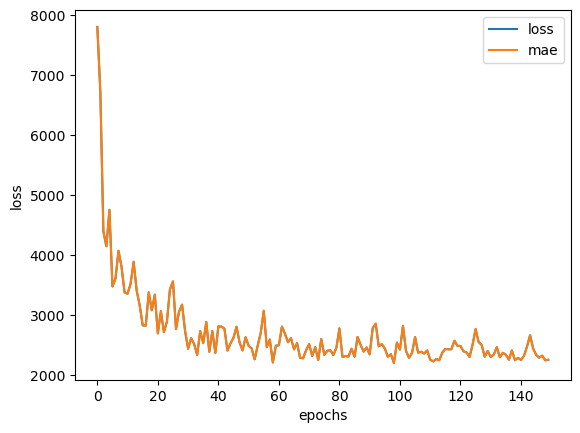

In [67]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalizarion and standardization)

In [68]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"])
)

# Create X and y values
X = df.drop("charges",axis=1)
y=df["charges"]

# Build train,test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [71]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [72]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [73]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [74]:
# Build a neural network model
tf.random.set_seed(42)
df_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
df_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=['mae']
                 )
df_model.fit(X_train_normal,y_train,epochs=150)

Epoch 1/150


/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-05-24 21:40:56.275244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 6ms/step - loss: 13054.3799 - mae: 13054.3799
Epoch 2/150
34/34 [==============================] - 0s 5ms/step - loss: 9219.5547 - mae: 9219.5547
Epoch 3/150
34/34 [==============================] - 0s 5ms/step - loss: 7614.8096 - mae: 7614.8096
Epoch 4/150
34/34 [==============================] - 0s 8ms/step - loss: 6733.3760 - mae: 6733.3760
Epoch 5/150
34/34 [==============================] - 0s 5ms/step - loss: 5401.8765 - mae: 5401.8765
Epoch 6/150
34/34 [==============================] - 0s 6ms/step - loss: 4037.2122 - mae: 4037.2122
Epoch 7/150
34/34 [==============================] - 0s 6ms/step - loss: 3598.4856 - mae: 3598.4856
Epoch 8/150
34/34 [==============================] - 0s 6ms/step - loss: 3457.5808 - mae: 3457.5808
Epoch 9/150
34/34 [==============================] - 0s 6ms/step - loss: 3376.8872 - mae: 3376.8872
Epoch 10/150
34/34 [==============================] - 0s 6ms/step - loss: 3314.9258 - mae: 3314.9258
Epoch 11/

In [75]:
df_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 1754.5504 - mae: 1754.5504


2023-05-24 21:41:24.962581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[1754.5504150390625, 1754.5504150390625]

# EXERCISES

In [76]:
from sklearn.model_selection import train_test_split
import numpy as np

In [77]:
# 1. Create your own regression dataset and build fot a model to it
X = tf.constant(np.array([-7,-4,-1,2,5,8]),dtype=tf.int32)
y = tf.constant(np.array([100,200,300,400,500,600]),dtype=tf.int32)

X_train = X[:4]
X_test = X[4:]
y_train = y[:4]
y_test = y[4:]

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['mae']
                )

history=model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 249.6475 - mae: 249.6475
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 249.1570 - mae: 249.1570
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 248.6660 - mae: 248.6660
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 248.1651 - mae: 248.1651
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 247.6521 - mae: 247.6521
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 247.1266 - mae: 247.1266
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 246.5887 - mae: 246.5887
Epoch 8/100
1/1 [==============================] - 0s 33ms/step - loss: 246.0334 - mae: 246.0334
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 245.4587 - mae: 245.4587


2023-05-24 21:41:25.320042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 244.8646 - mae: 244.8646
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 244.2460 - mae: 244.2460
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 243.5988 - mae: 243.5988
Epoch 13/100
1/1 [==============================] - 0s 6ms/step - loss: 242.9181 - mae: 242.9181
Epoch 14/100
1/1 [==============================] - 0s 13ms/step - loss: 242.2024 - mae: 242.2024
Epoch 15/100
1/1 [==============================] - 0s 6ms/step - loss: 241.4501 - mae: 241.4501
Epoch 16/100
1/1 [==============================] - 0s 6ms/step - loss: 240.6592 - mae: 240.6592
Epoch 17/100
1/1 [==============================] - 0s 13ms/step - loss: 239.8288 - mae: 239.8288
Epoch 18/100
1/1 [==============================] - 0s 12ms/step - loss: 238.9568 - mae: 238.9568
Epoch 19/100
1/1 [==============================] - 0s 7ms/step - loss: 238.0418 - mae: 238.0418
Epoch 20/100
1/1 [========

In [78]:
y_pred = model_1.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 38ms/step


2023-05-24 21:41:26.662900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(array([[486.70996],
        [732.75836]], dtype=float32),
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([500, 600], dtype=int32)>)

In [79]:
# 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset,how does it perform
X_train, X_test, y_train, y_test = train_test_split(X.numpy(),y.numpy(),test_size=.2,random_state=42)
tf.random.set_seed(42)
model_1_new = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1_new.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['mae']
                )

history1=model_1_new.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 301ms/step - loss: 449.8918 - mae: 449.8918
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 447.9690 - mae: 447.9690
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 445.5927 - mae: 445.5927
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 442.0386 - mae: 442.0386
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 436.6890 - mae: 436.6890
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 428.9614 - mae: 428.9614
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 418.2724 - mae: 418.2724
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 403.8813 - mae: 403.8813
Epoch 9/100


2023-05-24 21:41:26.937507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step - loss: 384.8848 - mae: 384.8848
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 360.2031 - mae: 360.2031
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 328.7653 - mae: 328.7653
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 289.1011 - mae: 289.1011
Epoch 13/100
1/1 [==============================] - 0s 7ms/step - loss: 239.6228 - mae: 239.6228
Epoch 14/100
1/1 [==============================] - 0s 7ms/step - loss: 178.3280 - mae: 178.3280
Epoch 15/100
1/1 [==============================] - 0s 7ms/step - loss: 127.7326 - mae: 127.7326
Epoch 16/100
1/1 [==============================] - 0s 7ms/step - loss: 130.6636 - mae: 130.6636
Epoch 17/100
1/1 [==============================] - 0s 23ms/step - loss: 153.2612 - mae: 153.2612
Epoch 18/100
1/1 [==============================] - 0s 12ms/step - loss: 157.0819 - mae: 157.0819
Epoch 19/100
1/1 [=======================

In [80]:
y_pred = model_1_new.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 46ms/step


2023-05-24 21:41:28.184585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(array([[670.4871 ],
        [438.29205]], dtype=float32),
 array([100, 200], dtype=int32))

(<AxesSubplot: >, <AxesSubplot: >)

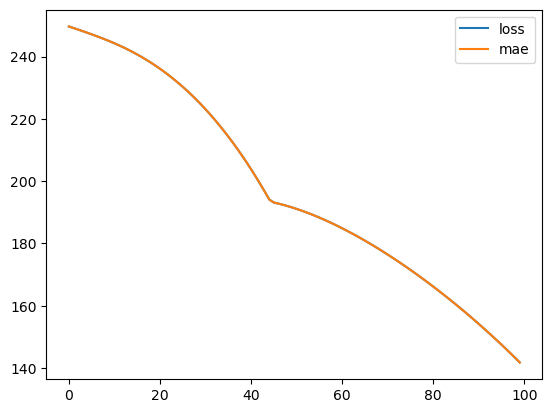

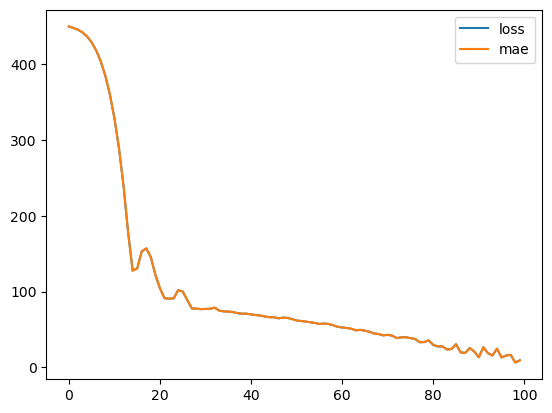

In [81]:
pd.DataFrame(history.history).plot(),pd.DataFrame(history1.history).plot() 

In [82]:
# 3. Try and improve insurance dataset
df_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1200      
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [83]:
# 4. Import the Boston pricing dataset from Tensorflow tf.keras.datasets and model it
from sklearn.datasets import load_boston
load = load_boston()
df = pd.DataFrame(load.data,columns=load.feature_names)

/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [84]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [85]:
df,df.describe()

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [86]:
X = df.drop("TAX",axis=1)
y = df["TAX"]
X,y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  PTRATIO  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0     15.3   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0     17.8   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0     17.8   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0     18.7   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0     18.7   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...      ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0     21.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0     21.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0     21.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0     21.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0     21.0   
 
           B  LSTAT  
 0    396.90   4.98  
 1    396.90   9.1

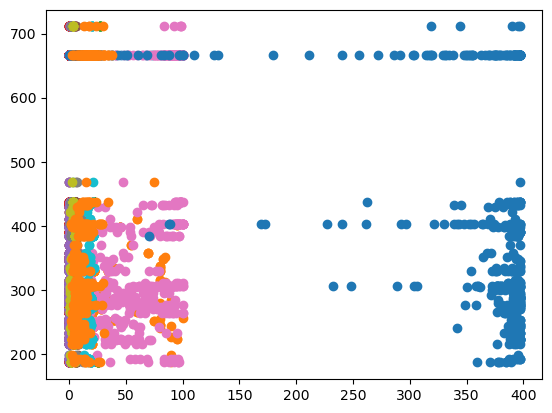

In [87]:
for i in X:
  plt.scatter(df[i],y)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,y_train

(         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD  PTRATIO  \
 477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0     20.2   
 15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0     21.0   
 332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0     16.9   
 423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0     20.2   
 19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0     21.0   
 ..        ...   ...    ...   ...     ...    ...   ...     ...   ...      ...   
 106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110   5.0     20.9   
 270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290   3.0     18.6   
 348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0     17.0   
 435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0     20.2   
 102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0     20.9   
 
           B  LSTAT  
 477

In [89]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (MinMaxScaler(),X.columns)
)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [91]:
model_boston = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
model_boston.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(lr=0.01),
                     metrics=['mae']
                     )
history_boston = model_boston.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100


/Users/ujjwalmk/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-05-24 21:41:29.497952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 1s 18ms/step - loss: 391.8914 - mae: 391.8914
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 216.5840 - mae: 216.5840
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 151.7992 - mae: 151.7992
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 140.1241 - mae: 140.1241
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 134.4250 - mae: 134.4250
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 130.3287 - mae: 130.3287
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 130.2526 - mae: 130.2526
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 129.8915 - mae: 129.8915
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 131.5610 - mae: 131.5610
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - loss: 131.7776 - mae: 131.7776
Epoch 11/100
13/13 [=

In [92]:
model_boston.evaluate(X_test,y_test)

4/4 [==============================] - 0s 17ms/step - loss: 148.7757 - mae: 148.7757


2023-05-24 21:41:45.419514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[148.77572631835938, 148.77572631835938]

<AxesSubplot: >

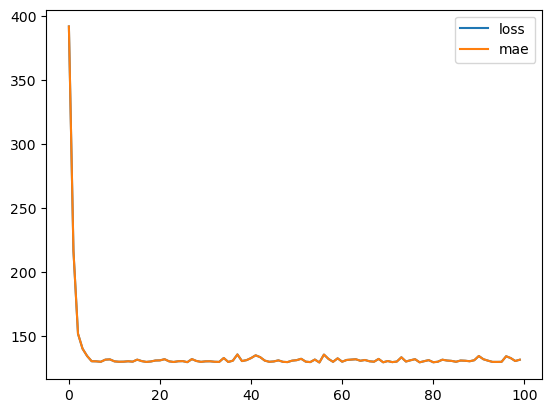

In [93]:
pd.DataFrame(history_boston.history).plot()